In [4]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv('marketing_campaign.csv',sep="\t")

In [11]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [17]:
data = data.dropna()

In [18]:
len(data)

2216

In [23]:
data['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [25]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

In [26]:
data['Age']= 2024 - data['Year_Birth']

In [27]:
data['Age'].head()

0    67
1    70
2    59
3    40
4    43
Name: Age, dtype: int64

In [28]:
data['Total_Purcase']=data['NumCatalogPurchases']+data['NumDealsPurchases']+data['NumStorePurchases']

In [32]:
data['Total_Purcase'].head()

0    17
1     5
2    13
3     6
4    14
Name: Total_Purcase, dtype: int64

In [33]:
data['Total_Spending'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                        data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])


In [34]:
data['Total_Spending'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Spending, dtype: int64

In [35]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Total_Purcase          0
Total_Spending         0
dtype: int64

<Axes: >

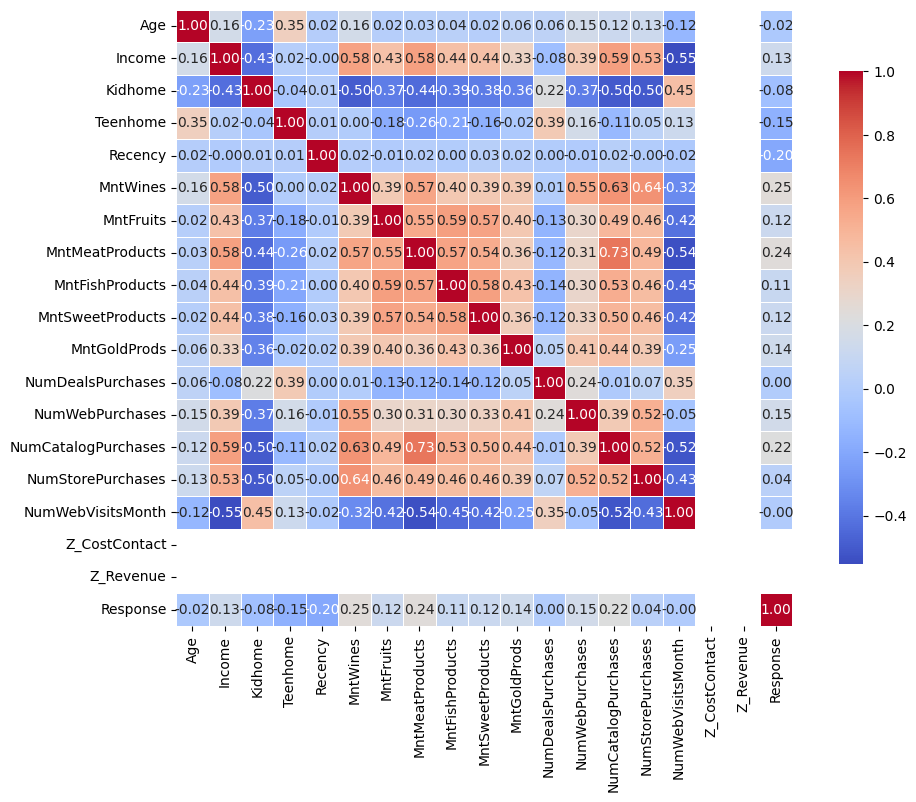

In [40]:
numerical_features=data[['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                       'MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                       'NumDealsPurchases', 'NumWebPurchases', 
                       'NumCatalogPurchases', 'NumStorePurchases', 
                       'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 
                       'Response']]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=.5, square=True, cbar_kws={"shrink": .8})

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

selected_features = numerical_features[['Income', 'Recency', 'MntWines', 
                                      'MntFruits', 'MntMeatProducts', 
                                      'MntFishProducts', 'MntSweetProducts']]

In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [45]:
inertia = []
K_range = range(1, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

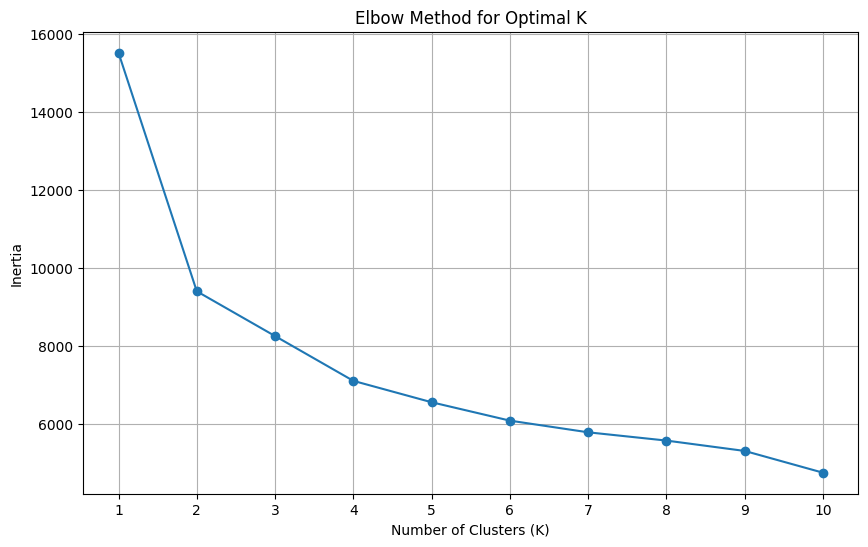

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()